In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
type_standar = "minmax"
# type_standar = "zscore"

In [3]:
file_path = './data/cuantifications/sample2.csv'
data_pure = pd.read_csv(file_path, delimiter=',')
data = data_pure[["CORPUS", "ANIO", "VOLUMEN", "PAGINAS", "CUARTIL"]]

In [4]:
data.head()

CORPUS  ANIO  VOLUMEN  PAGINAS  \
0  generalization zariouh’s property gaz local sp...  2025       23       11   
1  exploring benefits amf colonization improving ...  2025       25       16   
2  inoculation micromonospora sp enhances carbohy...  2025       15       15   
3  mitigating cold stress rice study genotype per...  2024       24       18   
4  characterization affinir primal topological sp...  2025     2025        8   

   CUARTIL  
0        0  
1        1  
2        1  
3        1  
4        3

In [5]:
# Cargar los datos
# file_path = 'data/embeddingstrain/df_tfidf_' + type_standar + '.csv'
file_path = 'data/embeddingstrain/df_embeddings_' + type_standar + '.csv'
data_emb = pd.read_csv(file_path, delimiter=',')

In [6]:
data_emb.head()

embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.229880  0.249529  0.081523  0.202636 -0.193608 -0.030638  0.188579   
1 -0.012822  0.149340  0.024315 -0.009801  0.088035 -0.033907  0.111280   
2 -0.055708  0.190835 -0.065515  0.225034  0.369172  0.113739  0.287937   
3  0.137942  0.176798 -0.032310  0.311785  0.261316  0.186766  0.018803   
4 -0.118311 -0.016865  0.039658  0.219906 -0.250331  0.054814 -0.052862   

    embed_7   embed_8   embed_9  ...  embed_378  embed_379  embed_380  \
0 -0.098298 -0.218437 -0.088780  ...  -0.042838  -0.232117  -0.262647   
1 -0.171367 -0.193791  0.289990  ...   0.178573  -0.004228  -0.047453   
2 -0.156514 -0.296518  0.024632  ...   0.300612  -0.066641  -0.076587   
3 -0.187183 -0.103112  0.044219  ...   0.363133   0.012749  -0.090156   
4  0.115424 -0.129113 -0.247627  ...  -0.027158  -0.341358  -0.035781   

   embed_381  embed_382  embed_383      ANIO   VOLUMEN  CUARTIL   PAGINAS  
0   0.127149  -0.106181  -0.089396  1.000000  0.000009     0.00  0.113402  
1  -0.051901   0.115226   0.034473  1.000000  0.000010     0.25  0.164948  
2  -0.150014   0.088423  -0.016509  1.000000  0.000006     0.25  0.154639  
3  -0.091900  -0.104825   0.144255  0.888889  0.000010     0.25  0.185567  
4   0.166203  -0.286782   0.024610  1.000000  0.000810     0.75  0.082474  

[5 rows x 388 columns]

## Analisis

##### Review

In [7]:
# Inspección Inicial
print("Información del dataset:")
print(data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CORPUS   333 non-null    object
 1   ANIO     333 non-null    int64 
 2   VOLUMEN  333 non-null    int64 
 3   PAGINAS  333 non-null    int64 
 4   CUARTIL  333 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 13.1+ KB
None


In [8]:
print("\nResumen estadístico:")
print(data.describe())


Resumen estadístico:
              ANIO       VOLUMEN     PAGINAS     CUARTIL
count   333.000000  3.330000e+02  333.000000  333.000000
mean   2023.660661  7.706979e+03   13.150150    1.288288
std       1.438137  1.370001e+05   10.154305    1.292150
min    2016.000000  0.000000e+00    0.000000    0.000000
25%    2024.000000  1.000000e+00    7.000000    0.000000
50%    2024.000000  1.400000e+01   11.000000    1.000000
75%    2024.000000  5.100000e+01   17.000000    2.000000
max    2025.000000  2.500196e+06   97.000000    4.000000


In [9]:
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
CORPUS     0
ANIO       0
VOLUMEN    0
PAGINAS    0
CUARTIL    0
dtype: int64


In [10]:
data.nunique()

CORPUS     333
ANIO         9
VOLUMEN    102
PAGINAS     44
CUARTIL      5
dtype: int64

In [21]:
data["ANIO"].unique()

array([2025, 2024, 2020, 2023, 2019, 2022, 2021, 2018, 2016], dtype=int64)

In [11]:
data.isin([0, 1, 2, 3, 4, 5]).all()

CORPUS     False
ANIO       False
VOLUMEN    False
PAGINAS    False
CUARTIL     True
dtype: bool

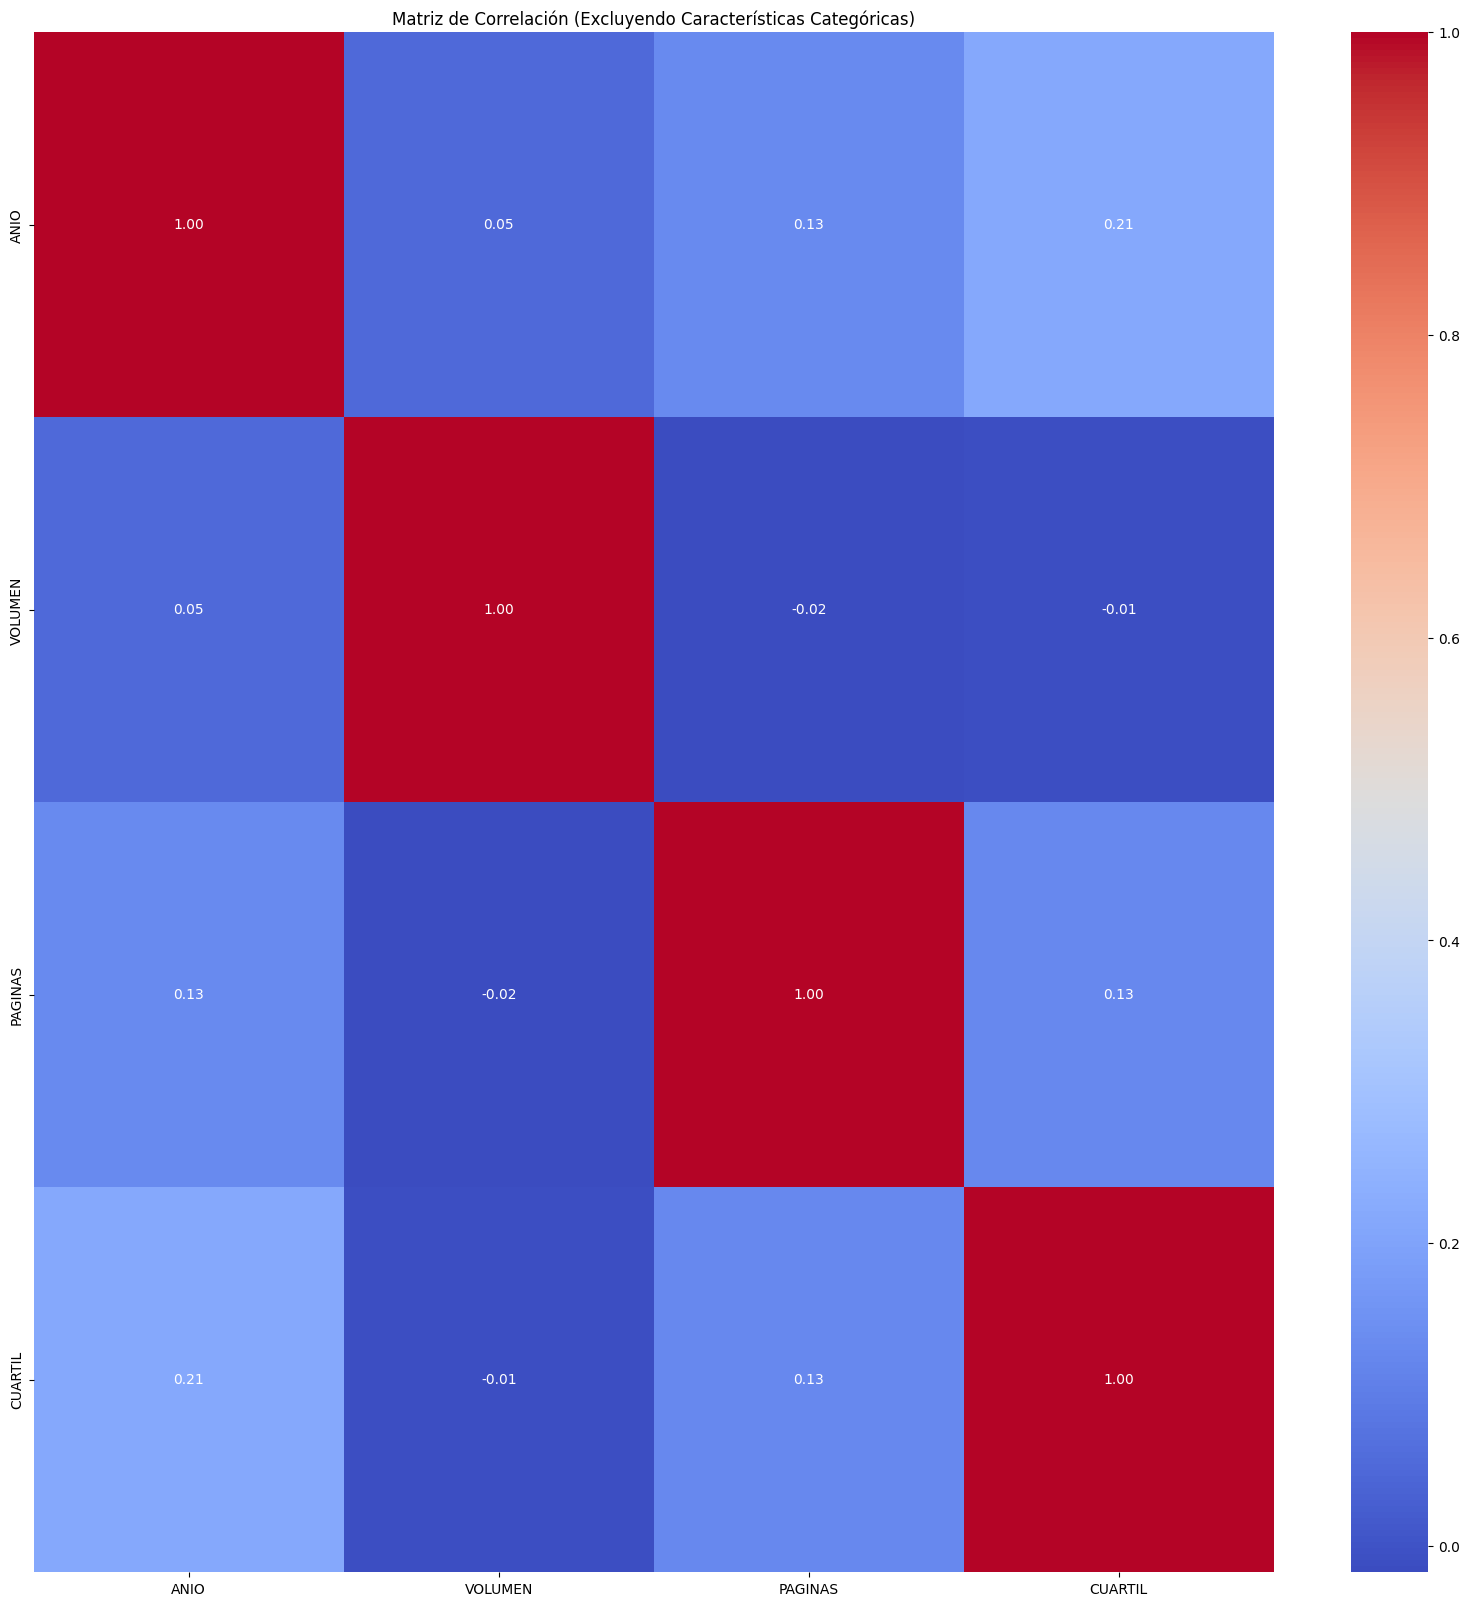

In [12]:
# Excluir las columnas categóricas
numericData = data.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlationMatrixPearson = numericData.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlationMatrixPearson, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación (Excluyendo Características Categóricas)')
plt.show()

### Visualizacion de datos

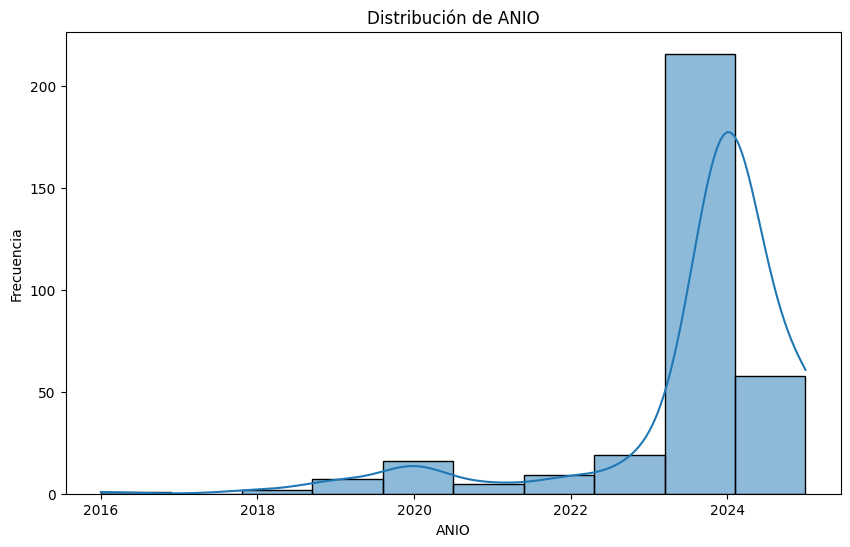

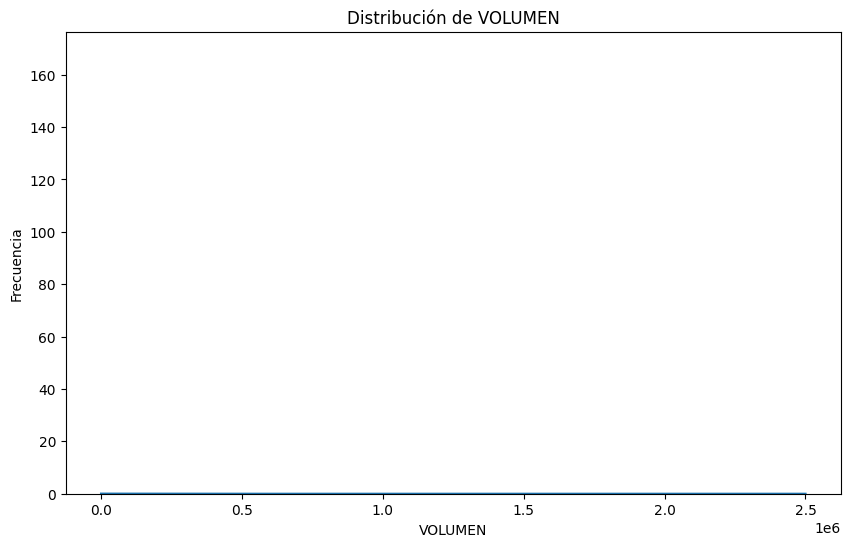

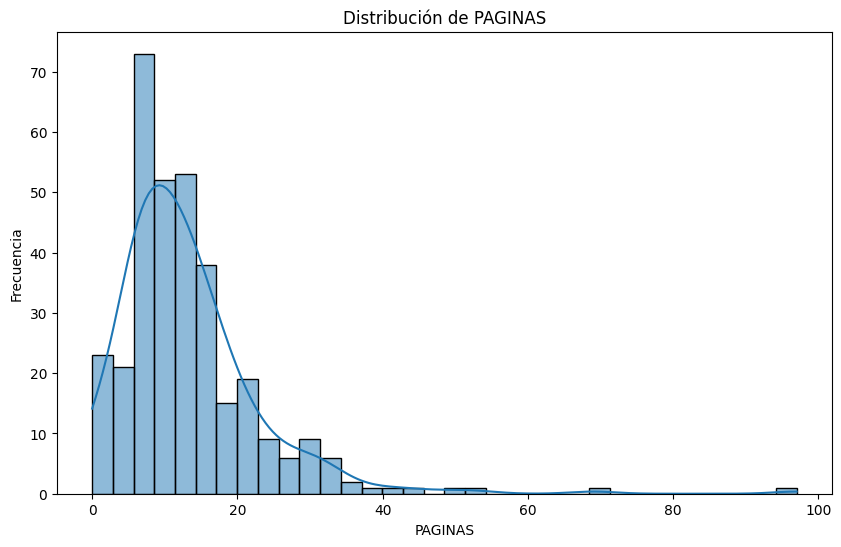

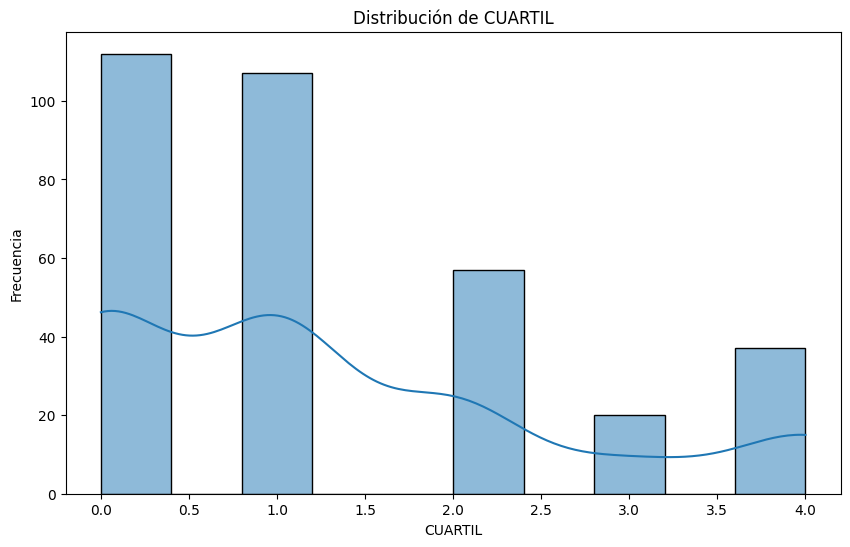

In [13]:
# Distribución de variables numéricas
num_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

C:\Users\saraujo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saraujo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 119948 (\N{MATHEMATICAL BOLD ITALIC SMALL K}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saraujo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 119934 (\N{MATHEMATICAL BOLD ITALIC CAPITAL W}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saraujo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 119945 (\N{MATHEMATICAL BOLD ITALIC SMALL H}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saraujo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

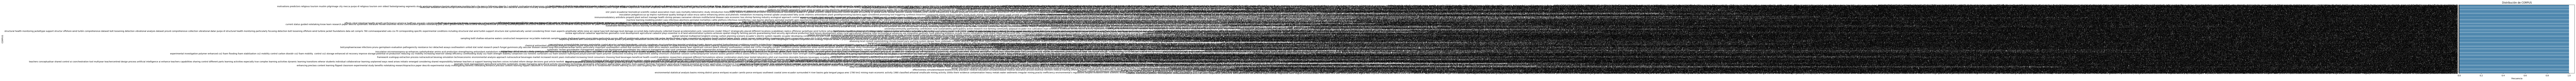

In [14]:
# Distribución de variables categóricas
cat_columns = data.select_dtypes(include=['object']).columns

for col in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

### Visualizacion de datos especificos

In [15]:
# Cantidad de datos por categoría en 'Marital_Status'
titulo_counts = data['CORPUS'].value_counts()

# Cantidad de datos por categoría en 'Education'
cuartil_counts = data['CUARTIL'].value_counts()

# Mostrar los resultados
print("Cantidad de datos por categoría en 'CORPUS':")
print(titulo_counts)

print("\nCantidad de datos por categoría en 'CUARTIL':")
print(cuartil_counts)

Cantidad de datos por categoría en 'CORPUS':
CORPUS
generalization zariouh’s property gaz local spectral theory work present time indepth study relationship upper semibfredholm spectrum left drazin spectrum connection leads definition new spectral property denoted ggaz generalizes previously studied property gaz framework local spectral theory derive characterizations operators satisfy ggaz property demonstrate set operators fulfilling property constitut banach spacir highlighting structural significance ggaz operator theory property gaz property ggaz semibfredholm operator left drazin operator svep                                                                                                                                                                                                                                                                                                                                                                                                          

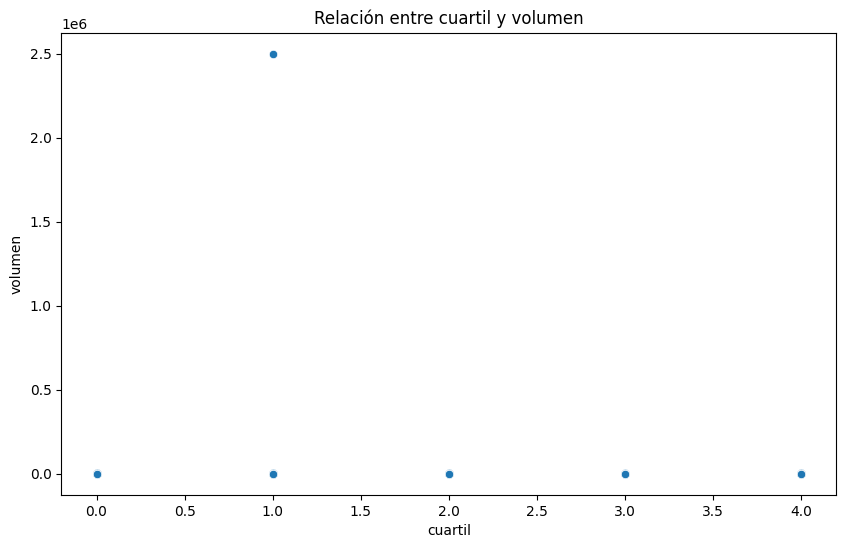

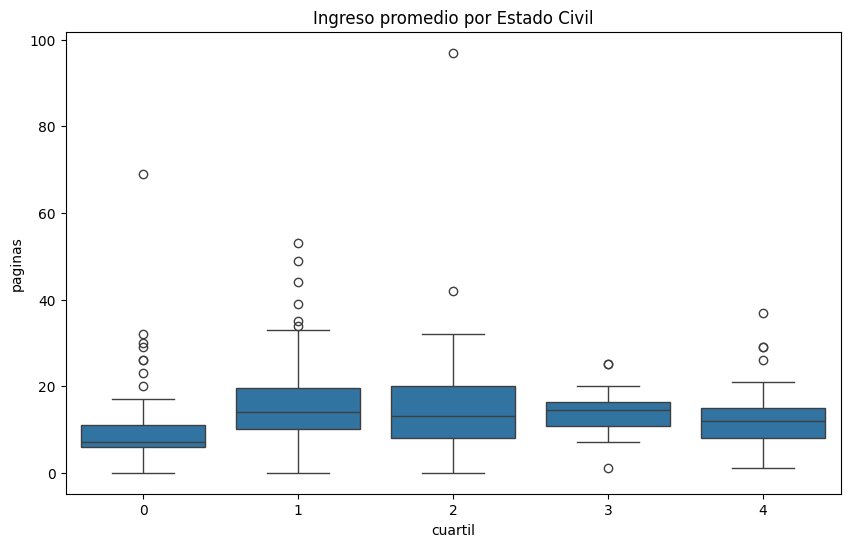

In [22]:
#Análisis Bivariado
# Relación entre ingresos y el número de compras de vino
plt.figure(figsize=(10, 6))
var_x = "CUARTIL"
var_y = "VOLUMEN"
sns.scatterplot(x=var_x, y=var_y, data=data)
plt.title('Relación entre ' + var_x.lower() + ' y ' + var_y.lower())
plt.xlabel(var_x.lower())
plt.ylabel(var_y.lower())
plt.show()

# Relación entre el estado civil y el ingreso promedio
plt.figure(figsize=(10, 6))
sns.boxplot(x='CUARTIL', y='PAGINAS', data=data)
plt.title('Ingreso promedio por Estado Civil')
plt.xlabel('cuartil')
plt.ylabel('paginas')
plt.show()

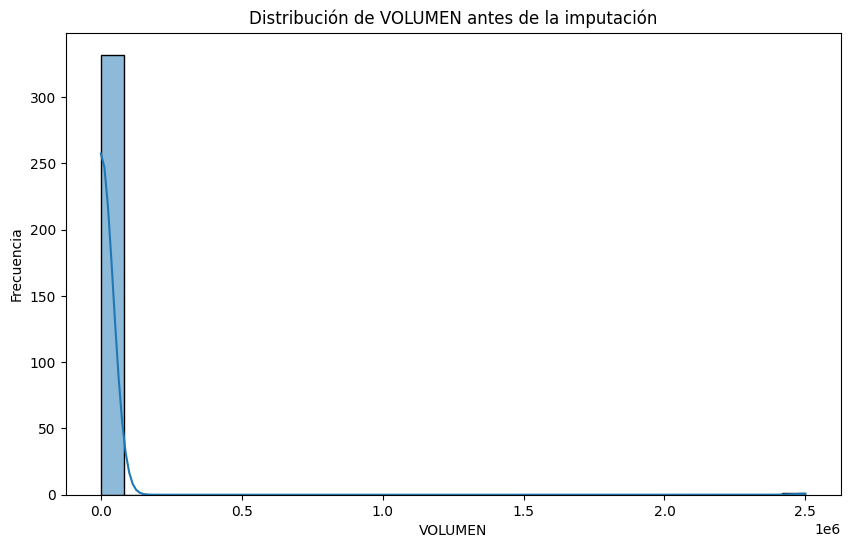

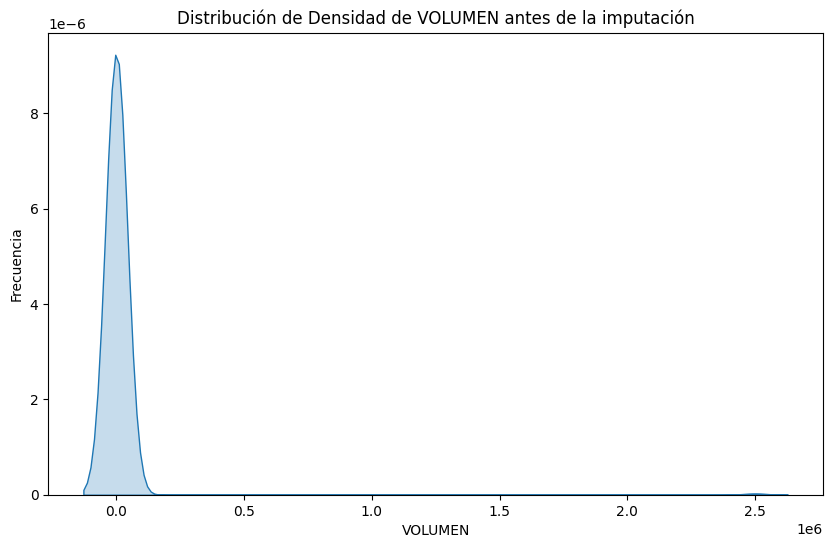

In [23]:
# Histograma de la distribución de 'VOLUMEN' antes de la imputación
plt.figure(figsize=(10, 6))
sns.histplot(data['VOLUMEN'], kde=True, bins=30)
plt.title('Distribución de VOLUMEN antes de la imputación')
plt.xlabel('VOLUMEN')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Densidad de la distribución de 'VOLUMEN'
plt.figure(figsize=(10, 6))
sns.kdeplot(data['VOLUMEN'].dropna(), fill=True)
plt.title('Distribución de Densidad de VOLUMEN antes de la imputación')
plt.xlabel('VOLUMEN')
plt.ylabel('Frecuencia')
plt.show()

### Correlación Pearson

In [18]:
# Establecer el umbral de correlación
threshold = 0.85

# Encontrar los pares de variables que superan el umbral
high_correlation_pairs = []

# Función para encontrar pares de variables que superan el umbral
def encontrar_pares_alta_correlacion(correlationMatrixPearson, threshold=0.85):
    high_correlation_pairs = []
    for i in range(len(correlationMatrixPearson.columns)):
        for j in range(i):
            if abs(correlationMatrixPearson.iloc[i, j]) > threshold:
                high_correlation_pairs.append((correlationMatrixPearson.columns[i], correlationMatrixPearson.columns[j], correlationMatrixPearson.iloc[i, j]))
    return high_correlation_pairs
    
# Encontrar los pares con alta correlación
pares = encontrar_pares_alta_correlacion(correlationMatrixPearson, threshold)

# Imprimir los pares de alta correlación
if pares:
    for pair in pares:
        print(f"Las variables {pair[0]} y {pair[1]} tienen una correlación de {pair[2]:.2f} usando Pearson")
else:
    print("No hay pares de variables con correlación mayor a 0.85 usando Pearson")

No hay pares de variables con correlación mayor a 0.85 usando Pearson


### Correlación de Spearman

Mide la relación monótona entre variables. Es decir, mide si existe un patrón de crecimiento aunque no de forma proporcional.
Cuando lo usamos con variables continuas, lo que hace es convertir los valores de variables a rangos y medir la relación entre estos rangos. Funciona muy bien con valores outliers.
Interpretación:

1: Correlación positiva perfecta. Si una variable aumenta, la otra también.
-1: Correlación negativa perfecta. Mientras que una variable aumenta, la otra disminuye de manera constante.
0: No existe correlación monótona entre variables.

In [19]:
# Calcular la matriz de correlación de Spearman
correlationMatrixSpearman = numericData.corr(method='spearman')

# Encontrar los pares con alta correlación
pares = encontrar_pares_alta_correlacion(correlationMatrixSpearman, threshold)

# Imprimir los pares de alta correlación
if pares:
    for pair in pares:
        print(f"Las variables {pair[0]} y {pair[1]} tienen una correlación de {pair[2]:.2f} usando Spearman")
else:
    print("No hay pares de variables con correlación mayor a 0.85 usando Spearman")

No hay pares de variables con correlación mayor a 0.85 usando Spearman


### Correlación de Kendall

Mide la concordancia entre los pares de observaciones, es decir, la frecuencia con la que los valores de las variables cambian en la misma dirección.
El coeficiente de Kendall ofrece una interpretación más exacta en términos de la proporción de pares concordantes o discordantes, por lo que es más exacto al evaluar relaciones monótonas estrictas.

In [20]:
# Calcular la matriz de correlación de Kendall
correlationMatrixKendall = numericData.corr(method='kendall')

# Encontrar los pares con alta correlación
pares = encontrar_pares_alta_correlacion(correlationMatrixKendall, threshold)

# Imprimir los pares de alta correlación
if pares:
    for pair in pares:
        print(f"Las variables {pair[0]} y {pair[1]} tienen una correlación de {pair[2]:.2f} usando Kendall")
else:
    print("No hay pares de variables con correlación mayor a 0.85 usando Kendall")

No hay pares de variables con correlación mayor a 0.85 usando Kendall
